In [18]:
#-*- coding:utf-8 -*-
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
import requests
import pymysql
import random
from tqdm import tqdm
import time
import math
import joblib
import pickle

tierList = ['IRON','BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND']
# tierList = ['DIAMOND']
teamPositionList = ['TOP', 'JUNGLE', 'MIDDLE','BOTTOM','UTILITY']
championNameList = []

#########################
def connect_mysql(db='mydb'):
    conn = pymysql.connect(host='svc.sel4.cloudtype.app', port=32509,
                        user='root', password='1234',
                        db=db, charset='utf8')
    return conn

queueId = str(420) #큐아이디
# limit_value = str(200) # 리미트값
############################

conn = connect_mysql()
cursor = conn.cursor()
query = "SELECT champion_name FROM champListT;" #총 챔피언 리스트
cursor.execute(query)
result = cursor.fetchall()
data = list(result)
for i in range(len(data)):

    championNameList.append(data[i][0])           
for tier in tqdm(tierList):
    for teamPosition in teamPositionList:
        for championName in championNameList:
    
            query = "select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = '" +tier+ "' and teamPosition = '" +teamPosition+ "' and championName = '" +championName+ "' and queueId = '" +queueId+ "'"
            print(query)
            cursor.execute(query)

            result = cursor.fetchall()
            data = list(result)
            # print(len(data))
            joblib.dump(data, './'+queueId+'_'+tier+'_'+championName+'.pkl')


        # for championName1 in championNameList:
        #     testList = []
        #     for i in range(len(data)): 
        #         win,deaths,gameDuration,kda,totalDamageDealtToChampions,goldEarned,championName = data[i]
        #         # print(championName)
        #         if championName == championName1:
        #             testList.append(data[i])

            # if len(testList) > 100 : 
            #     testList = testList[:100] #500개로 줄임 이유 : 과적합
            # elif len(testList) < 25 : 
            #     testList = []
          
         
            # if  len(testList) > 50 :
            #     print(len(testList))
            #     lose_gameDuration_List = []
            #     lose_kda_List = []
            #     lose_Mean_totalDamageDealtToChampions = []
            #     lose_Mean_goldEarned = []
            #     # lose_Mean_deaths = []


            #     win_gameDuration_List = []
            #     win_kda_List = []
            #     win_Mean_totalDamageDealtToChampions = []
            #     win_Mean_goldEarned = []
            #     # win_Mean_deaths = []

            #     for e in testList:
            #         win,deaths,gameDuration,kda,totalDamageDealtToChampions,goldEarned,championName = e
            #         if deaths == 0:
            #             deaths = 1
            #         if win == 'False':
            #             lose_gameDuration_List.append(gameDuration)
            #             lose_kda_List.append(kda)
            #             lose_Mean_totalDamageDealtToChampions.append(int(totalDamageDealtToChampions/gameDuration/deaths))
            #             lose_Mean_goldEarned.append(int(goldEarned/gameDuration/deaths))
            #         elif win == 'True' :
            #             win_gameDuration_List.append(gameDuration)
            #             win_kda_List.append(kda)
            #             win_Mean_totalDamageDealtToChampions.append(int(totalDamageDealtToChampions/gameDuration/deaths))
            #             win_Mean_goldEarned.append(int(goldEarned/gameDuration/deaths))


            #     w = len(win_Mean_goldEarned)
            #     l = len(lose_Mean_goldEarned)

            #     if w > l : 
            #         win_Mean_goldEarned = win_Mean_goldEarned[:l]
            #         win_Mean_totalDamageDealtToChampions = win_Mean_totalDamageDealtToChampions[:l]
            #         win_kda_List = win_kda_List[:l]
            #         win_gameDuration_List = win_gameDuration_List[:l]
            #     else : 
            #         lose_Mean_goldEarned = lose_Mean_goldEarned[:w]
            #         lose_Mean_totalDamageDealtToChampions = lose_Mean_totalDamageDealtToChampions[:w]
            #         lose_kda_List = lose_kda_List[:w]
            #         lose_gameDuration_List = lose_gameDuration_List[:w]
            #     if (w + l) >100 :
            #         win_Mean_goldEarned = win_Mean_goldEarned[:50]
            #         win_Mean_totalDamageDealtToChampions = win_Mean_totalDamageDealtToChampions[:50]
            #         win_kda_List = win_kda_List[:50]
            #         win_gameDuration_List = win_gameDuration_List[:50]
   
            #         lose_Mean_goldEarned = lose_Mean_goldEarned[:50]
            #         lose_Mean_totalDamageDealtToChampions = lose_Mean_totalDamageDealtToChampions[:50]
            #         lose_kda_List = lose_kda_List[:50]
            #         lose_gameDuration_List = lose_gameDuration_List[:50]
                
            #     allkda = win_kda_List+lose_kda_List
                
            #     Mean_totalDamageDealtToChampions = win_Mean_totalDamageDealtToChampions + lose_Mean_totalDamageDealtToChampions
            #     Mean_goldEarned = win_Mean_goldEarned + lose_Mean_goldEarned

            #     tier_data=[[t,g,k]for t,g,k in zip(Mean_totalDamageDealtToChampions,Mean_goldEarned,allkda)]

            #     tier_target=[1]*len(win_kda_List)+[0]*len(lose_kda_List)

            #     tierMap =  {'allkda' : allkda , 'Mean_totalDamageDealtToChampions':Mean_totalDamageDealtToChampions , 'Mean_goldEarned':Mean_goldEarned}

                #z-정규화
                # mean = np.mean(tier_data, axis=0)
                # std = np.std(tier_data, axis=0)
                # train_scaled = (tier_data - mean) / std

                # dataset = {'data' : train_scaled, 'target' : tier_target}

            # 입력 데이터와 타깃을 준비합니다.
                # X, y = dataset['data'], dataset['target']

                # K 최근접이웃 모델 객체를 만듭니다.
                # model = KNeighborsClassifier(n_neighbors=3)
                
            # K 최근접 이웃 모델에 입력 데이터와 타깃을 입력하고 학습시킨다.
                # model.fit(X,y)
                # 학습시킨 모델을 현재 경로에 knn_model.pkl 파일로 저장합니다.

            
conn.close()            
                        


  0%|          | 0/7 [00:00<?, ?it/s]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'IRON' and teamPosition = 'TOP' and cham

 14%|█▍        | 1/7 [53:38<5:21:53, 3218.89s/it]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'BRONZE' and teamPosition = 'T

 29%|██▊       | 2/7 [1:48:01<4:30:23, 3244.74s/it]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'SILVER' and teamPosition = 'T

 43%|████▎     | 3/7 [2:41:51<3:35:51, 3237.98s/it]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'GOLD' and teamPosition = 'TOP' and cham

 57%|█████▋    | 4/7 [3:35:56<2:42:01, 3240.49s/it]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'PLATINUM' and teamP

 71%|███████▏  | 5/7 [4:31:18<1:49:00, 3270.15s/it]

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'EMERALD' and teamPositio

 86%|████████▌ | 6/7 [5:25:34<54:25, 3265.39s/it]  

select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPosition = 'TOP' and championName = 'Annie' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPosition = 'TOP' and championName = 'Olaf' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPosition = 'TOP' and championName = 'Galio' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPosition = 'TOP' and championName = 'TwistedFate' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPosition = 'TOP' and championName = 'XinZhao' and queueId = '420'
select win,gameDuration,kda,totalDamageDealtToChampions,goldEarned from riottvT where tier = 'DIAMOND' and teamPositio

100%|██████████| 7/7 [6:19:56<00:00, 3256.61s/it]


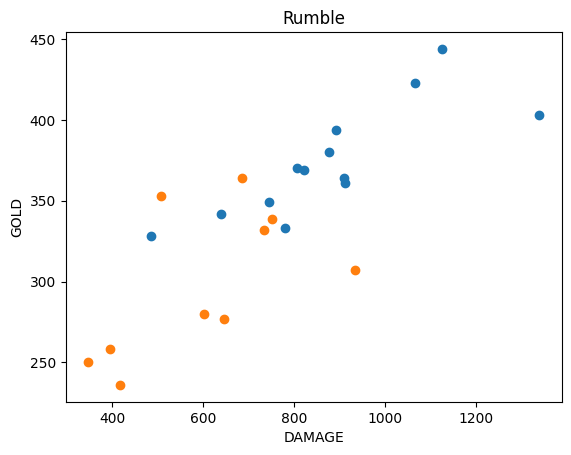

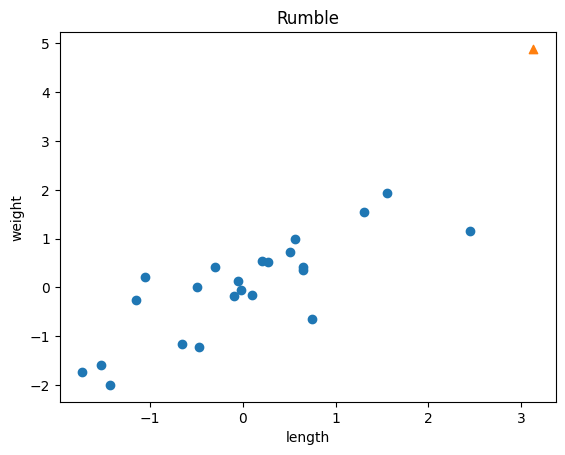

{"123": "\uc2b9", "\uc815\ud655\ub3c4": 0.8695652173913043, "\ucd1d\ub370\uc774\ud130\uae38\uc774": 23, "\uad6c\uac04": "GOLD", "\uce90\ub9ad": "Rumble", "key": "\uc2b9"}


In [27]:
#-*- coding:utf-8 -*-
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from tqdm import tqdm
import time
import math
import joblib
#빅데이터전용
import pickle 
from sklearn.datasets import fetch_openml

data = sys.argv[1:]
# key = data[0]
# tier = data[1]
# teamPosition = data[2]
# gameDuration = int(data[3])
# kda = float(data[4])
# totalDamageDealtToChampions = int(int(data[5])/gameDuration) 
# goldEarned = int(int(data[6])/gameDuration)
# championName = data[7]
# queueId = str(data[8])
key= '123'
tier = 'GOLD'
kda = 10
totalDamageDealtToChampions = 1500
goldEarned = 600
teamPosition = 'TOP'
championName = 'Rumble' #캐릭터
tier_my = [totalDamageDealtToChampions,goldEarned,kda]
mean = np.mean(tier_my, axis=0)
std = np.std(tier_my, axis=0)

new = (tier_my - mean) / std
 
str1 ='./'+ queueId+'_'+tier+'_'+championName+'.pkl'
# str2 = './'+queueId+'_'+tier+'_'+teamPosition+ '_' + championName+'.pickle'
# with open(str2,'rb') as f:
#     loaded_model = pickle.load(f)
# str2 = './420_BRONZE_JUNGLE_LeeSin.pkl'	
data = joblib.load(str1)

   
lose_gameDuration_List = []
lose_kda_List = []
lose_Mean_totalDamageDealtToChampions = []
lose_Mean_goldEarned = []

win_gameDuration_List = []
win_kda_List = []
win_Mean_totalDamageDealtToChampions = []
win_Mean_goldEarned = []

for e in data:
    win,gameDuration,kda,totalDamageDealtToChampions,goldEarned = e
    if win == 'False':
        lose_gameDuration_List.append(gameDuration)
        lose_kda_List.append(kda)
        lose_Mean_totalDamageDealtToChampions.append(int(totalDamageDealtToChampions/gameDuration))
        lose_Mean_goldEarned.append(int(goldEarned/gameDuration))
    elif win == 'True' :
        win_gameDuration_List.append(gameDuration)
        win_kda_List.append(kda)
        win_Mean_totalDamageDealtToChampions.append(int(totalDamageDealtToChampions/gameDuration))
        win_Mean_goldEarned.append(int(goldEarned/gameDuration))
# print(win_gameDuration_List)

#######################################################################################################################################


try:
    allkda = win_kda_List+lose_kda_List
    Mean_totalDamageDealtToChampions = win_Mean_totalDamageDealtToChampions + lose_Mean_totalDamageDealtToChampions
    Mean_goldEarned = win_Mean_goldEarned + lose_Mean_goldEarned

    tier_data=[[t,g,k]for t,g,k in zip(Mean_totalDamageDealtToChampions,Mean_goldEarned,allkda)]

    #그래프
    plt.scatter(win_Mean_totalDamageDealtToChampions, win_Mean_goldEarned) 
    plt.scatter(lose_Mean_totalDamageDealtToChampions, lose_Mean_goldEarned)
    # plt.xlim((0, 2000))
    plt.title(championName)
    plt.xlabel('DAMAGE') 
    plt.ylabel('GOLD') 
    plt.show()


    tier_target=[1]*len(win_kda_List)+[0]*len(lose_kda_List)
    kn = KNeighborsClassifier(n_neighbors=3)

    kn.fit(tier_data,tier_target)
    a1 = kn.score(tier_data,tier_target)



    #z-정규화
    mean = np.mean(tier_data, axis=0)
    std = np.std(tier_data, axis=0)

    # print(mean, std)
    train_scaled = (tier_data - mean) / std

    # print(totalDamageDealtToChampions)
    # new = ([totalDamageDealtToChampions, goldEarned] - mean) / std
    new = (tier_my - mean) / std
    #그래프
    plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
    plt.scatter(new[0], new[1], marker='^')
    plt.title(championName)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

    kn.fit(train_scaled, tier_target)
    a1 = kn.score(train_scaled, tier_target) # 1.0
    trans={1:'승', 0:'패'}
    a = trans[kn.predict([new])[0]]

    if len(tier_target) < 10 : 

        data5 = {key:"데이터부족" , "정확도" : a1 , "총데이터길이"  :len(tier_target), '구간' : tier , '캐릭' : championName , "key":"데이터부족"}
    else :
        data5 = {key:a , "정확도" : a1 , "총데이터길이"  :len(tier_target), '구간' : tier , '캐릭' : championName, "key" : a}  
    json_string = json.dumps(data5)
    # print(a, a1)
    print(json_string)
except Exception as e:
    data5 = {key:"에러" , "정확도" : 0 , "총데이터길이"  :0, '구간' : tier , '캐릭' : championName, "key" : "에러"}  
    json_string = json.dumps(data5)
    # print(a, a1)
    print(json_string)

In [28]:
data5

{'123': '승',
 '정확도': 0.8695652173913043,
 '총데이터길이': 23,
 '구간': 'GOLD',
 '캐릭': 'Rumble',
 'key': '승'}